# Data science group 69 project 

## Project Goal:
We are going to use the bus opal data from Transport NSW to predict the number of passengers for each month if COVID-19 did not happen. We will also then compare this data with the actual number of passengers during the COVID-19 period.

## Data Source and Background:
The dataset we will be using comes from the Transport for NSW website, which has several different types of data available about its services. We will be using the Monthly Opal Bus Trips by Contract Area data, which contains information about opal card usage within the bus system throughout Sydney. 

#### Import the methods

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")


#### Data Cleaning

In [2]:
# read the dataset
data = pd.read_csv("Untitled Folder/Bus Card Type.xlsx - Bus Card Type.csv.csv")

In [3]:
## fill the null values with zero, in order to establish the model and plot graphs
data=data.fillna(0)

In [4]:
## converted the Categorical data type of date to a Date type in the Date column 
data['Date'] = pd.to_datetime( data['Date'], 
 format = '%Y-%m',errors = 'coerce')
data.Date.head()

0   2016-07-01
1   2016-08-01
2   2016-09-01
3   2016-10-01
4   2016-11-01
Name: Date, dtype: datetime64[ns]

In [5]:
data.head()

,Month number,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Day Pass without SAF.1,Monthly passengers
0,1,2016-07-01,390433,62800,136064,0.0,1149,138642,206110,0.0,0.0,0.0,0.0,0,935198
1,2,2016-08-01,386386,67010,73590,0.0,1281,296261,224668,0.0,0.0,0.0,0.0,0,1049196
2,3,2016-09-01,370068,70022,61676,0.0,1320,203827,218598,0.0,0.0,0.0,0.0,0,925511
3,4,2016-10-01,381402,78951,60635,0.0,1410,197558,227088,0.0,0.0,0.0,0.0,0,947044
4,5,2016-11-01,405245,76328,57858,0.0,1462,255994,236965,0.0,0.0,0.0,0.0,0,1033852


In [6]:
data.shape

(62, 15)

In [7]:
data.tail(20)

,Month number,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Day Pass without SAF.1,Monthly passengers
42,43,2020-01-01,452466,95311,41589,3015.0,1955,26904,215635,10190.0,72400.0,9.0,120.0,120,919594
43,44,2020-02-01,467925,82827,54455,2941.0,1957,248840,221171,10801.0,79982.0,16.0,150.0,150,1171065
44,45,2020-03-01,392860,59296,58725,2745.0,1535,193275,186468,7789.0,72009.0,24.0,150.0,150,974876
45,46,2020-04-01,171160,16162,13028,1218.0,676,3287,91583,1763.0,37115.0,4.0,93.0,93,336089
46,47,2020-05-01,216827,28396,17912,1424.0,898,64900,118350,2940.0,49688.0,0.0,97.0,97,501432
47,48,2020-06-01,260477,40075,24328,1593.0,1164,166127,145567,4980.0,62234.0,0.0,121.0,121,706666
48,49,2020-07-01,288798,55356,29962,1794.0,1173,89474,158537,6217.0,71847.0,53.0,128.0,128,703339
49,50,2020-08-01,270591,41851,30755,1697.0,1159,148147,150110,5639.0,67871.0,0.0,98.0,98,717918
50,51,2020-09-01,278146,44307,30751,1747.0,1110,128544,158729,6581.0,74706.0,0.0,96.0,96,724717
51,52,2020-10-01,275385,50513,29663,1780.0,1219,93826,162732,6706.0,81315.0,0.0,141.0,141,703280


#### Plot the graph

<AxesSubplot:xlabel='year', ylabel='million'>

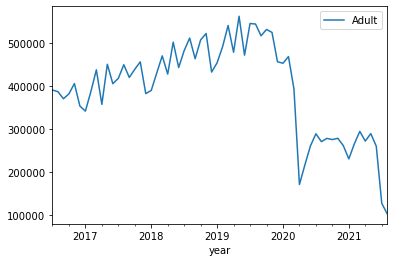

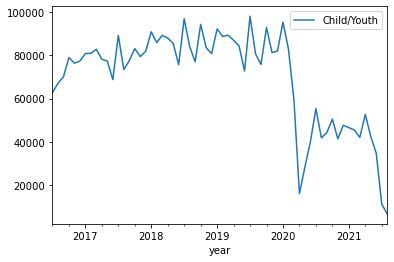

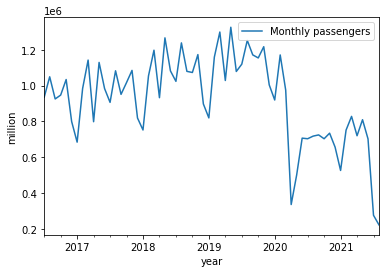

In [8]:
data.plot(x='Date',xlabel='year',y='Adult')
data.plot(x='Date',xlabel='year',y='Child/Youth')
data.plot(ylabel='million',x='Date',xlabel='year',y='Monthly passengers')

In [9]:
before_covid=(data['Monthly passengers'][:44])
print("The total number of average monthly passengers before covid is:\n", before_covid.sum())

The total number of average monthly passengers before covid is:
 45763020


In [10]:
have_covid=(data['Monthly passengers'][44:])
print("The total number of average monthly passengers during covid is:\n", have_covid.sum())

The total number of average monthly passengers during covid is:
 11595381


Loss of passengers during covid-19 period

In [11]:
print(before_covid.sum()-have_covid.sum())

34167639


### Linear Regression

##  Compare the accuracy of using one feature and two features in linear model

##### Only use one feature - Month Number

In [12]:
reg = linear_model.LinearRegression()
X = data[['Month number'[:44]]]
y = data['Monthly passengers'[:44]]
reg.fit(X, y)

print("y =X *", reg.coef_, "+", reg.intercept_)

y =X * [-6152.93754879] + 1118953.0327868853


In [13]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)

print("MSE:", mse)
print("R Squared:", r2)

MSE: 46882728949.29938
R Squared: 0.20547118354855975


#### Use two feature - Month Number & Adult

In [14]:
reg = linear_model.LinearRegression()
X = data[['Month number','Adult']]
y = data['Monthly passengers']
reg.fit(X, y)

print("y =X *", reg.coef_, "+", reg.intercept_)

y =X * [-165.81391045    2.11499808] + 99110.49371422525


In [15]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)

print("MSE:", mse)
print("R Squared:", r2)

MSE: 6359288888.733247
R Squared: 0.8922281533632114



#### To compare which set is better for predicting the number of monthly passengers 
Using two features in linear model is better, because there is a significant difference in terms of the Rsquare values: 0.2>0.89
A R2 value of 0.892 proves that the model is relatively precise.

#### Split the data into two parts:
train - dates before covid
<br>test - period after covid happen and lockdown;

In [16]:
train, test = train_test_split(data, test_size=0.26, random_state=142)
print("The size for train: ", train.shape)
print("The size for test: ", test.shape)

The size for train:  (45, 15)
The size for test:  (17, 15)


### Apply train and test

#### Checking whether using Adult or Child/Youth set works better in terms of predicting the monthly passengers number

#####  for Child/Youth

In [17]:
# Asign the train and test
X_train = train[['Month number','Child/Youth']]
y_train = train['Monthly passengers']
X_test =test[['Month number','Child/Youth']]
y_test = test['Monthly passengers']
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [290.79715456   9.06710879] + 265841.65711651125


In [18]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (45, 2)
y_train shape: (45,)
X_test shape: (17, 2)
y_test shape: (17,)


In [19]:
# get prediction
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)

MSE: 12490776380.187359
Root MSE: 111762.14198102754
R Squared: 0.7470890629002103


#####  for Adult

In [20]:
# Asign the train and test
X_train = train[['Month number','Adult']]
y_train = train['Monthly passengers']
X_test =test[['Month number','Adult']]
y_test = test['Monthly passengers']
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-355.30678609    2.18033359] + 67845.03598738741


In [21]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (45, 2)
y_train shape: (45,)
X_test shape: (17, 2)
y_test shape: (17,)


In [22]:
# get prediction
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)

MSE: 5586575396.47092
Root MSE: 74743.39700917345
R Squared: 0.8868840514236396


In [23]:
y_hat_train=reg.predict(X_train)
y_hat_train

array([1194439.02455479, 1082571.08179167, 1039093.66277793,
        618096.193504  , 1072444.13297535,  809575.51377329,
        639958.7487781 ,  918763.9141423 ,  323845.52618602,
        999098.66505776,  894352.20794085, 1239278.37315722,
        949637.78814806,  680110.98388704, 1109471.07415593,
        908422.08517967,  909584.79731337, 1018201.52173282,
       1152704.73375369, 1179419.58233872, 1017821.53056327,
        550931.10482201,  842910.89681406, 1242156.32590812,
        910074.6810549 ,  997682.75266475, 1084174.49347599,
        873650.80698908,  656175.45690336,  270135.27609418,
       1045677.21915187, 1126582.94530293, 1024328.95983753,
        946599.01624689,  677497.63980385, 1279664.42949587,
       1041755.49033807,  640058.34340933, 1055308.70670756,
        424686.82126542, 1067587.04105101,  973234.05898398,
       1162619.14853826,  835798.29828319,  991782.94514595])


# Comparison between predicted data using adult and child/youth:
<br>
From the correlation coefficient we got, the R squared value for using child/youth is 0.74 comparing 0.88 for the adult using adults . As higher R-squared value indicates a better fit for the model, it's evident that using adult set is better in fitting the model.

#### Result

In [24]:
## monthly passengers number during the covid period assuming there's no covid in NSW
MonthlyPassengerNoCovid=reg.predict(X_test)
print(len(MonthlyPassengerNoCovid))
MonthlyPassengerNoCovid

17


array([1172596.17987226, 1211110.81867338,  618717.06304198,
        613247.65713305, 1047036.53046076,  626414.34133222,
        908100.51567335,  977161.01495989, 1195872.55479501,
       1098036.01277425, 1233624.3302095 ,  898007.40112356,
       1045091.13796459,  689410.80736668,  523900.80858024,
        649800.24907247,  655839.86070883])

In [25]:
## change monthly passengers number during actual covid period into array
ActualMonthlyPassengers = np.asarray(data['Monthly passengers'][45:])
ActualMonthlyPassengers

array([336089, 501432, 706666, 703339, 717918, 724717, 703280, 734405,
       656525, 526306, 751509, 828098, 720066, 809557, 702365, 275963,
       222270], dtype=int64)

In [26]:
## change covid period date into array 
HavingCovidPeriod = np.asarray(data['Date'][45:])
HavingCovidPeriod

array(['2020-04-01T00:00:00.000000000', '2020-05-01T00:00:00.000000000',
       '2020-06-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-08-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-11-01T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-02-01T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-05-01T00:00:00.000000000',
       '2021-06-01T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-08-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [27]:
## create a table that contain covid period date, actual covid data and predicted covid period data
pd.set_option('display.float_format', lambda x: '%.0f' % x)
CompareMonthlyPassengers = pd.DataFrame({'Date':HavingCovidPeriod,'Have COVID':ActualMonthlyPassengers,'No COVID(Prediceted)':MonthlyPassengerNoCovid})
CompareMonthlyPassengers

,Date,Have COVID,No COVID(Prediceted)
0,2020-04-01,336089,1172596
1,2020-05-01,501432,1211111
2,2020-06-01,706666,618717
3,2020-07-01,703339,613248
4,2020-08-01,717918,1047037
5,2020-09-01,724717,626414
6,2020-10-01,703280,908101
7,2020-11-01,734405,977161
8,2020-12-01,656525,1195873
9,2021-01-01,526306,1098036


<AxesSubplot:title={'center':'comparison of Monthly Passengers'}, xlabel='Date'>

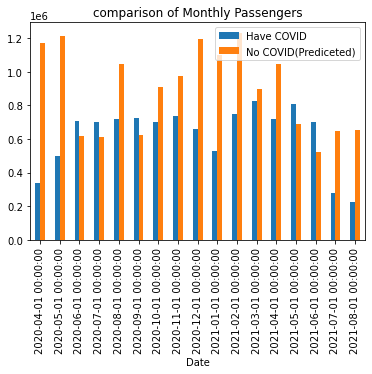

In [28]:
CompareMonthlyPassengers.plot(kind = 'bar', x = 'Date',title = 'comparison of Monthly Passengers')

<AxesSubplot:title={'center':'comparison of Monthly Passengers'}, xlabel='Date'>

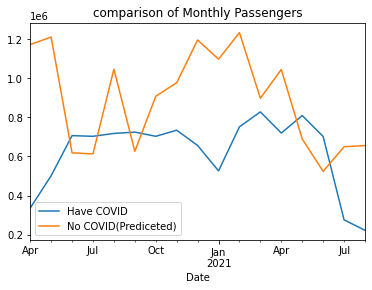

In [29]:
CompareMonthlyPassengers.plot(kind = 'line', x = 'Date',title = 'comparison of Monthly Passengers')

# As the graphs above shown, the implementation of lockdown had a significant impact on the number of monthly passengers of the bus system

#### improve the model by using meaningful feature:Ｍｏｎｔｈ

In [30]:
Month = np.asarray([7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8])
Month

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8])

In [31]:
data['Month'] = Month
data

,Month number,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Day Pass without SAF.1,Monthly passengers,Month
0,1,2016-07-01,390433,62800,136064,0,1149,138642,206110,0,0,0,0,0,935198,7
1,2,2016-08-01,386386,67010,73590,0,1281,296261,224668,0,0,0,0,0,1049196,8
2,3,2016-09-01,370068,70022,61676,0,1320,203827,218598,0,0,0,0,0,925511,9
3,4,2016-10-01,381402,78951,60635,0,1410,197558,227088,0,0,0,0,0,947044,10
4,5,2016-11-01,405245,76328,57858,0,1462,255994,236965,0,0,0,0,0,1033852,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,2021-04-01,271849,52658,36117,1944,1353,69598,176368,8887,101192,1,99,99,720066,4
58,59,2021-05-01,289229,42457,42044,1967,1329,132272,183225,10133,106754,0,147,147,809557,5
59,60,2021-06-01,259924,34715,32919,1314,1081,102099,163825,9366,97027,0,95,95,702365,6
60,61,2021-07-01,127354,11205,10461,513,488,1276,75935,0,48652,0,79,79,275963,7


In [32]:
# Split the data
train, test = train_test_split(data, test_size=0.26, random_state=142)
print(train.shape)
print(test.shape)

(45, 16)
(17, 16)


In [33]:
# Asign the train and test
X_train = train[['Month','Adult']]
y_train = train['Monthly passengers']
X_test =test[['Month','Adult']]
y_test = test['Monthly passengers']
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [2.36681728e+03 2.20610057e+00] + 32012.806711881305


In [34]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)

MSE: 5829726789.635612
Root MSE: 76352.64756140164
R Squared: 0.8819607668470344


In [35]:
## monthly passengers number during the covid period assuming there's no covid in NSW
MonthlyPassengerNoCovid=reg.predict(X_test)
print(len(MonthlyPassengerNoCovid))
MonthlyPassengerNoCovid

17


array([1178101.48381227, 1226838.00030096,  620852.16806742,
        619632.19445324, 1066277.34368983,  622049.18910031,
        889808.02725564,  978768.93834745, 1214145.97510126,
       1096068.94871123, 1230533.31307069,  897092.14838226,
       1036596.56096429,  688516.46448632,  522189.06099009,
        663207.9844506 ,  672045.2946953 ])

In [36]:
## create a table that contain covid period date, actual covid data and predicted covid period data
pd.set_option('display.float_format', lambda x: '%.0f' % x)
CompareMonthlyPassengers = pd.DataFrame({'Date':HavingCovidPeriod,'Have COVID':ActualMonthlyPassengers,'No COVID(Prediceted)':MonthlyPassengerNoCovid})
CompareMonthlyPassengers

,Date,Have COVID,No COVID(Prediceted)
0,2020-04-01,336089,1178101
1,2020-05-01,501432,1226838
2,2020-06-01,706666,620852
3,2020-07-01,703339,619632
4,2020-08-01,717918,1066277
5,2020-09-01,724717,622049
6,2020-10-01,703280,889808
7,2020-11-01,734405,978769
8,2020-12-01,656525,1214146
9,2021-01-01,526306,1096069


<AxesSubplot:title={'center':'comparison of Monthly Passengers'}, xlabel='Date'>

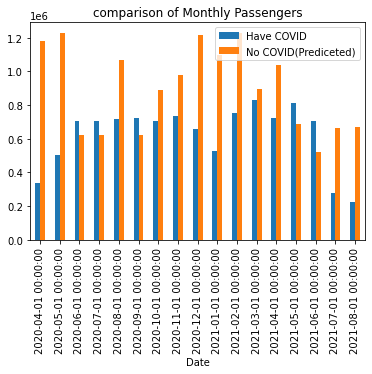

In [37]:
CompareMonthlyPassengers.plot(kind = 'bar', x = 'Date',title = 'comparison of Monthly Passengers')

<AxesSubplot:title={'center':'comparison of Monthly Passengers'}, xlabel='Date'>

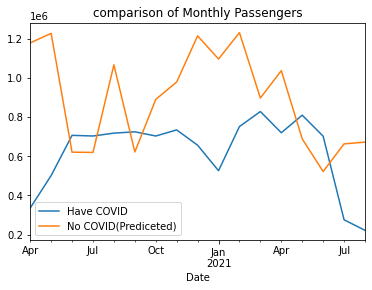

In [38]:
CompareMonthlyPassengers.plot(kind = 'line', x = 'Date',title = 'comparison of Monthly Passengers')

From the graph above, it's evident that the trend of monthly passengers during covid-period is relatively stable and consistent, whereas the predicted trend is fluctuating. This is mainly caused by students'records. For instances,in July and October, 2020,of the predicted trend, there are two obvious troughs, which might be caused by school's term break. On the other hand, the consistent trend of passengers number during covid time is caused by the implementation of remote learning. Therefore, the crest and trough caused by term-break didn't exist.

## Using another model to try to predict the number of monthly passengers in sydney bus system

### Logistic Regression

In [39]:
x_train = train.drop(['Monthly passengers', 'Date'],axis = 1)
y_train = train['Monthly passengers']
x_test = test.drop(['Monthly passengers', 'Date'],axis = 1)
y_test = test['Monthly passengers']
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)
print(x_train.head())
print(y_train.shape)

x_train shape: (45, 14)
y_train shape: (45,)
x_test shape: (17, 14)
y_test shape: (17,)
    Month number   Adult  Child/Youth  Concession  Employee  Free Travel  \
28            29  521433        83569       64437      2325         2040   
35            36  471266        72749       60924      2539         1904   
42            43  452466        95311       41589      3015         1955   
53            54  261170        47658       26377      1755         1291   
43            44  467925        82827       54455      2941         1957   

    School Student  Senior/Pensioner  On Demand   CTP  \
28          253123            246005          0     0   
35          249581            219739          0     0   
42           26904            215635      10190 72400   
53           60504            163863       6924 86850   
43          248840            221171      10801 79982   

    Day Pass Child/Youth w/o SAF  Day Pass without SAF  \
28                             1                    43

In [40]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
print(x_train)
print(y_train)

    Month number   Adult  Child/Youth  Concession  Employee  Free Travel  \
28            29  521433        83569       64437      2325         2040   
35            36  471266        72749       60924      2539         1904   
42            43  452466        95311       41589      3015         1955   
53            54  261170        47658       26377      1755         1291   
43            44  467925        82827       54455      2941         1957   
6              7  341332        80779       42676         0         1329   
57            58  271849        52658       36117      1944         1353   
0              1  390433        62800      136064         0         1149   
60            61  127354        11205       10461       513          488   
29            30  432004        80732       47328      1901         1909   
17            18  382007        81840       52591         2         1520   
37            38  543465        80637       81393      3333         2116   
4           

In [42]:
y_hat_test = model.predict(x_test)

In [43]:
print(y_hat_test)

[1082149 1073174  717918  809557  703339  809557 1053954 1016913 1171358
 1073174 1325741  925511 1082149  809557  703339  809557  809557]


In [44]:
print("The accuracy score for the testing data is:", accuracy_score(y_test, y_hat_test))

The accuracy score for the testing data is: 0.0


# As the accuracy score of logistic regression  model is 0.0, therefore the linear model prediction should be used for predicting the number of monthly passengers.

### Conclusion

Covid-19 has a significant impact on the number of passengers of Sydney Bus System. Bust system lost at least around thirty-five million passengers, since April 2020. Due to the implementation of online classes and other lockdown restrictions, the trend of monthly passengers is getting stable and consistent,which has less flutuations compared with the predicted trend. It's evident that holiday and break have less influences in terms of affecting the monthly passengers, due to the fear of potential covid-19 infections. 
Decrease of passengers in public transport sector, indicates a risk of contraction in the economy cycle, less money would flow into the physical industry, which severely impacts tertiary industry, especially hospitality and education sectors.